In [1]:
import numpy as np
import pandas as pd

In [2]:
column_renames = {
  "notering": "positie",
  "nr.": "positie",
  "nr": "positie",
  "jaar": "jaartal",
  "year": "jaartal",
  "title": "titel",
  "artist": "artiest"
}

In [3]:
# https://www.nporadio2.nl/top2000?edition=top-2000-van-2022-12-25

In [5]:
folder = "data"
full = pd.DataFrame()
start_year = 1999
end_year = 2024

for year in range(start_year, end_year+1):
    df = pd.read_excel(f'{folder}/TOP-2000-{year}.xlsx')
    if len(df) > 2000:
        df = df.iloc[1:]
    df.columns = [str.lower(col) for col in df.columns]
    df.rename(columns=column_renames, inplace=True)
    print(df.columns.values)
    df['lijst_jaar'] = year
    df['positie'] = df['positie'].astype(int)
    df['jaartal'] = df['jaartal'].astype(int)
    df['lijst_jaar'] = df['lijst_jaar'].astype(int)
    full = pd.concat([full, df], ignore_index=True)
full

['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']
['positie' 'titel' 'artiest' 'jaartal']


,positie,titel,artiest,jaartal,lijst_jaar
0,1,Bohemian Rhapsody,Queen,1975,1999
1,2,Hotel California,Eagles,1977,1999
2,3,Child In Time,Deep Purple,1972,1999
3,4,Stairway To Heaven,Led Zeppelin,1971,1999
4,5,Paradise By The Dashboard Light,Meat Loaf,1978,1999
...,...,...,...,...,...
51995,1996,Once Upon A Time In The West,Dire Straits,1979,2024
51996,1997,Bobby Jean,Bruce Springsteen,1984,2024
51997,1998,De Langste Nacht,Goldband,2021,2024
51998,1999,It's The End Of The World As We Know It (Album...,R.E.M.,1987,2024


In [8]:
df = full.copy()

In [9]:
df["artiest"] = df["artiest"].replace("Beatles", "The Beatles")

In [13]:
print("Total amount of artists", len(df['artiest'].unique()))

Total amount of artists 2282


In [14]:
print("Total amount of songs", len(df['titel'].unique()))

Total amount of songs 4948


In [63]:
all_artists_top_10 = df[df['positie'] <= 10]['artiest'].unique()
all_artists_top_10, len(all_artists_top_10)

(array(['Queen', 'Eagles', 'Deep Purple', 'Led Zeppelin', 'Meat Loaf',
        'The Beatles', 'John Lennon', 'Rolling Stones',
        'Simon & Garfunkel', 'Procol Harum', "Guns N' Roses", 'Animals',
        'Dire Straits', 'Billy Joel', 'Alan Parsons Project', 'Doors',
        'Boudewijn De Groot', 'Coldplay', 'U2', 'Pink Floyd', 'Metallica',
        'Ramses Shaffy & Liesbeth List', 'Ramses Shaffy', 'Adele',
        'Bruce Springsteen', 'Claudia De Breij', 'David Bowie',
        'Pearl Jam', 'Toto', 'Danny Vera', 'Boudewijn de Groot', 'Normaal',
        'Golden Earring', 'Dermot Kennedy'], dtype=object),
 34)

In [64]:
artist_by_year = df.groupby(["artiest", 'lijst_jaar']).size().reset_index(name='count')

In [67]:
artist_by_year.sort_values(by="count", ascending=False).head()

,artiest,lijst_jaar,count
20352,The Beatles,2008,55
20351,The Beatles,2007,55
20350,The Beatles,2006,55
20349,The Beatles,2005,55
20348,The Beatles,2004,55


In [70]:
# Reshape the data from long to wide format
artist_counts_wide = artist_by_year.pivot(index='lijst_jaar', 
                                       columns='artiest', 
                                       values='count')

In [71]:
artist_by_year[:10]

,artiest,lijst_jaar,count
0,10CC,1999,2
1,10CC,2000,2
2,10CC,2001,2
3,10CC,2002,3
4,10CC,2003,4
5,10CC,2004,4
6,10CC,2005,3
7,10CC,2006,3
8,10CC,2007,4
9,10CC,2008,4


In [72]:
t = df["lijst_jaar"].unique()

In [74]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set_theme()

# fig, ax = plt.subplots(figsize=(10, 6))
# g = sns.lineplot(data=artist_by_year, x="lijst_jaar", y="count", hue="artiest", ax=ax)

# g.set_xticks(t)

# # Add legend
# ax.legend()
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# ax.set_ylim(0, 50)  # Adjust these numbers to your desired range

# # Customize axes
# ax.set_xlabel('Year')
# ax.set_ylabel('Count')
# ax.set_title('Artist Counts Over Time')

# plt.show()

In [83]:
# Ontwikkeling van stem gedrag over de jaren
bins = [0, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['<1950s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
df['decade'] = pd.cut(df['jaartal'], bins=bins, labels=labels)
df[0:10]

,positie,titel,artiest,jaartal,lijst_jaar,decade
0,1,Bohemian Rhapsody,Queen,1975,1999,1970s
1,2,Hotel California,Eagles,1977,1999,1970s
2,3,Child In Time,Deep Purple,1972,1999,1970s
3,4,Stairway To Heaven,Led Zeppelin,1971,1999,1970s
4,5,Paradise By The Dashboard Light,Meat Loaf,1978,1999,1970s
5,6,Yesterday,The Beatles,1965,1999,1960s
6,7,Imagine,John Lennon,1971,1999,1970s
7,8,Angie,Rolling Stones,1973,1999,1970s
8,9,Bridge Over Troubled Water,Simon & Garfunkel,1970,1999,1960s
9,10,A Whiter Shade Of Pale,Procol Harum,1967,1999,1960s


In [84]:
decade_by_year = df.groupby(["decade", 'lijst_jaar']).size().reset_index(name='count')
decade_by_year[10:14]

/var/folders/np/sw3cwd7x6rv0llrv26d2w1s40000gn/T/ipykernel_96206/3533719879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_by_year = df.groupby(["decade", 'lijst_jaar']).size().reset_index(name='count')


,decade,lijst_jaar,count
10,<1950s,2009,4
11,<1950s,2010,4
12,<1950s,2011,4
13,<1950s,2012,4


In [85]:
decade_by_year['percentage'] = (decade_by_year['count'] / 2000) * 100

[<matplotlib.lines.Line2D object at 0x14eee1270>, <matplotlib.lines.Line2D object at 0x15ee26bf0>, <matplotlib.lines.Line2D object at 0x15ee3f2b0>, <matplotlib.lines.Line2D object at 0x15ee3e620>, <matplotlib.lines.Line2D object at 0x15ee3e260>, <matplotlib.lines.Line2D object at 0x15ee3dc60>, <matplotlib.lines.Line2D object at 0x15ee3d300>, <matplotlib.lines.Line2D object at 0x15ee3d5a0>, <matplotlib.lines.Line2D object at 0x15ee3c520>] ['1970s', '1960s', '1980s', '1990s', '1950s', '<1950s', '2000s', '2010s', '2020s']


/Users/jeroen/Documents/Personal_Projects/top-2000 EDA/.venv/lib/python3.10/site-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


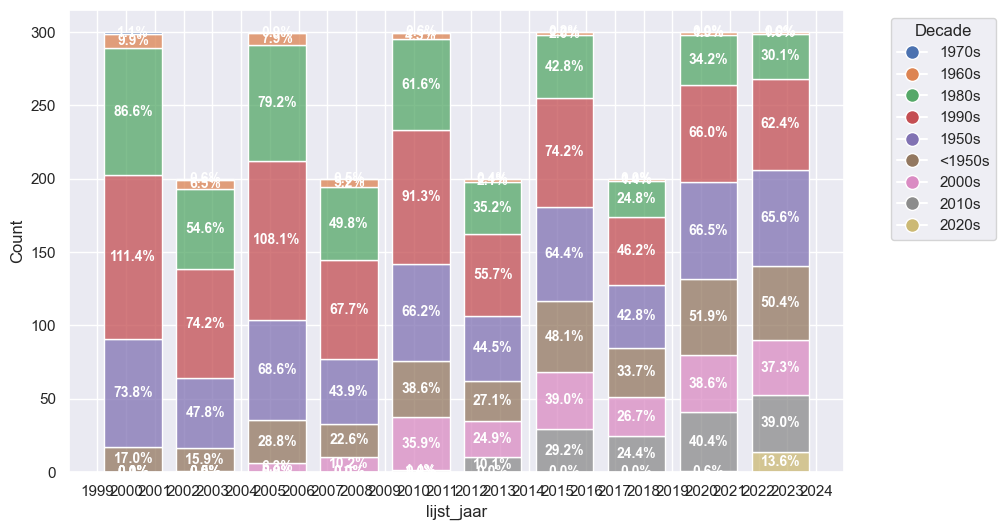

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 6))
g = sns.histplot(data=decade_by_year, x='lijst_jaar', 
                weights='percentage',
                shrink=0.8,
                hue='decade', multiple='stack', ax=ax)

# Unique years for x-axis
unique_years = df['lijst_jaar'].unique()
# Set the x-ticks to be the unique years
g.set_xticks(unique_years)

# Add legend outside the plot
decades = df['decade'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i], markersize=10) for i, _ in enumerate(decades)]
labels = [decade for decade in decades]
print(handles, labels)
ax.legend(handles=handles, labels=labels, title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentage values
for c in g.containers:
    labels = [f'{w:.1f}%' for w in c.datavalues]
    g.bar_label(c, labels=labels, label_type='center', fontsize=10, color='white', weight='bold')

plt.show()

In [ ]:
# What was het jaar met de hoogste binnenkomers?
# Welk album heeft het meest aantal nummers in de top 2000?
# Welk genre is het meest populair in de top 2000 over tijd? 